<a href="https://colab.research.google.com/github/angela-giraldo-duque/Python/blob/master/EjClusteringySVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**APRENDIZAJE NO SUPERVISADO**

**Agrupar usuarios Twitter de acuerdo a su personalidad con K-means clustering**

Archivo .csv que contiene rasgos de la personalidad de usuarios de Twitter. Hay filtrados 140 famosos del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como «Ocean: The Big Five» se tiene como características de entrada:

usuario= (el nombre en Twitter)

«op» = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte

«co» =Conscientiousness – grado de orden, prolijidad, organización

«ex» = Extraversion – grado de timidez, solitario o participación ante el grupo social

«ag» = Agreeableness – grado de empatía con los demás, temperamento

«ne» = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.

Wordcount – Cantidad promedio de palabras usadas en sus tweets

Categoria – Actividad laboral del usuario (actor, cantante, etc.)

El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1.Actor/actriz 
2.Cantante 
3.Modelo 
4.Tv, series 
5.Radio 
6.Tecnología 
7.Deportes 
8.Politica 
9.Escritor 

In [ ]:
# Deben importar numpy, pandas y matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#from google.colab import drive 
#drive.mount('/content/drive')
#%cd /content/drive/My\ Drive/Colab Notebooks

# Deben importar el archivo .csv y leer las cabeceras
df = pd.read_csv('/content/analisis.csv')
print(df.columns)

Index(['usuario', 'op', 'co', 'ex', 'ag', 'ne', 'wordcount', 'categoria'], dtype='object')


In [ ]:
# Cuantos por categoria?
df.groupby(['categoria']).size()#agg(['mean', 'count'])

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

In [ ]:
# solo trabajamos con 3 categorias
X = np.array(df[["op","ex","ag"]])
y = np.array(df['categoria'])
print(np.min(y),np.max(y))
print(X.shape,y.shape)

1 9
(140, 3) (140,)


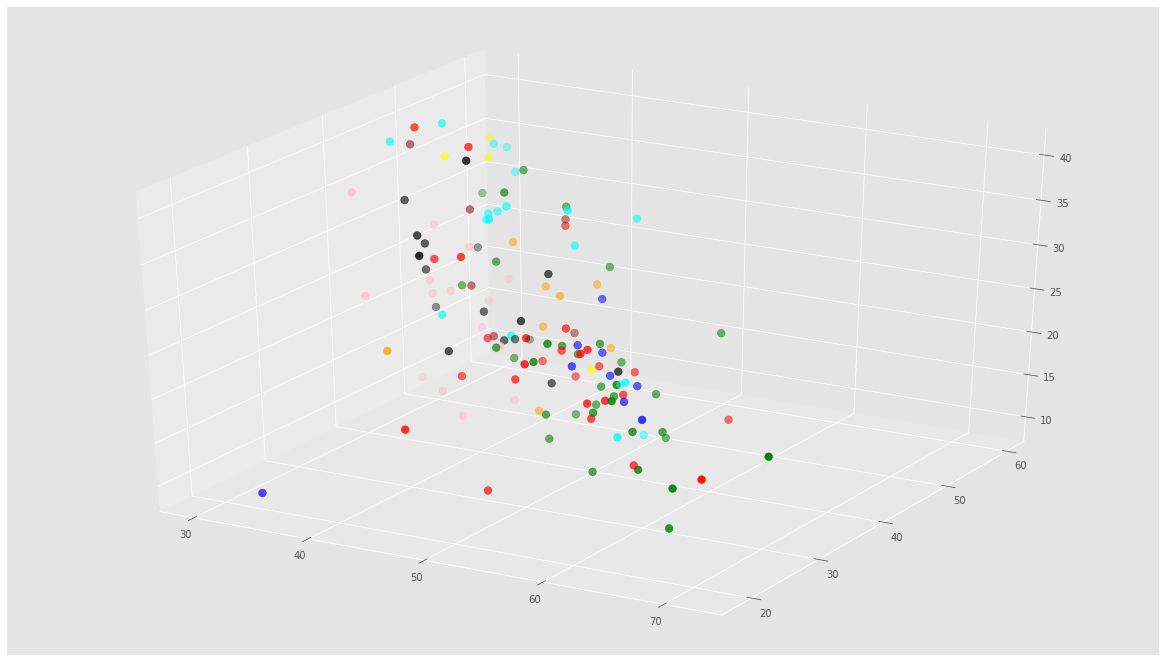

In [ ]:
# Grafica 3D representado las categorias
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

range(1, 20)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       

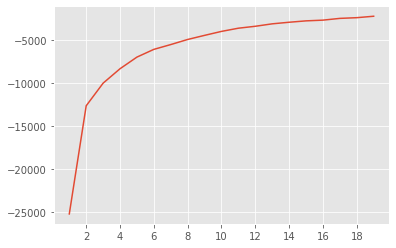

In [ ]:
# encontrar el valor de k ideal (clusters)
Nc = range(1, 20)
print(Nc)
#lista = [print(i) for i in range(7)]
ks = np.array(list(Nc))
print(ks)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i]  .fit(X).score(X) for i in range(len(kmeans))]
print(score)

from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# Graficar el numero de clusters vs score. titulo: Elbow curve
ax.plot(ks,score)
plt.show()

In [ ]:
# Se elige k=5 y se entrena con kmeans
kmeans = KMeans(n_clusters=9).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[41.525745   47.59998895 28.321652  ]
 [41.25709443 27.84871157 15.040178  ]
 [54.27833828 34.97025189 16.65589683]
 [32.75337467 53.94690556 32.38760022]
 [47.82567981 36.40817806 22.17201719]
 [49.57595712 42.733017   16.65080554]
 [38.24145104 41.23878    21.97076796]
 [65.5299666  27.1434742  14.6252708 ]
 [35.71026347 42.05257971 35.75173512]]


[8 4 8 0 0 6 6 3 5 8 5 6 2 4 6 5 8 6 5 8 3 5 1 8 5 4 0 6 0 4 6 2 5 2 3 3 0
 3 0 4 0 0 0 8 2 2 5 2 8 3 5 6 0 7 8 2 4 5 6 2 1 6 5 2 6 6 7 1 2 0 0 1 5 5
 6 2 6 0 3 8 8 6 2 5 4 0 5 0 2 4 2 6 4 5 5 6 8 5 0 5 2 4 4 3 7 2 6 0 6 4 5
 8 3 0 6 5 1 7 0 6 4 8 5 4 2 1 1 5 5 4 5 5 6 6 2 8 8 7 4 8]


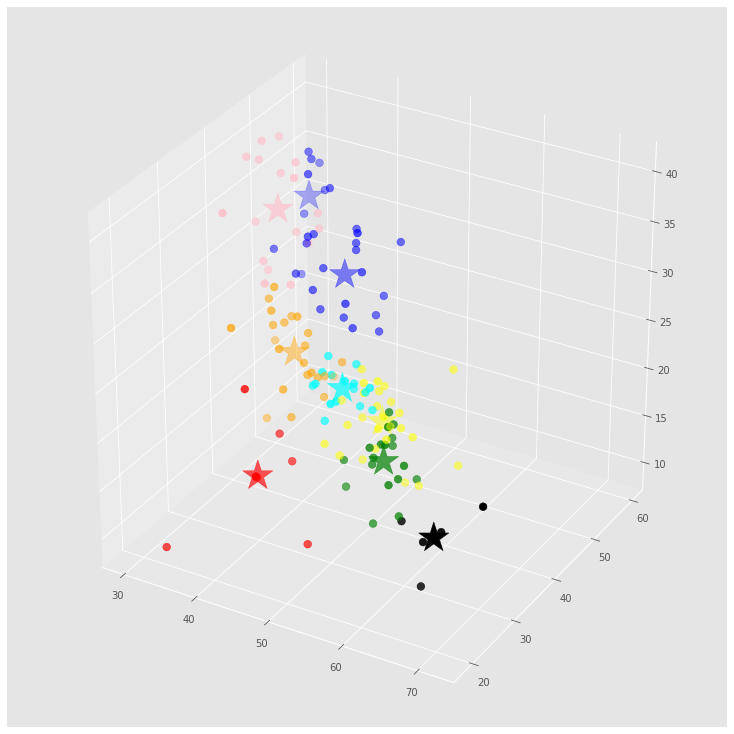

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(labels)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink'] #['red','green','blue']#,'cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
fig.set_size_inches(10,10)
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

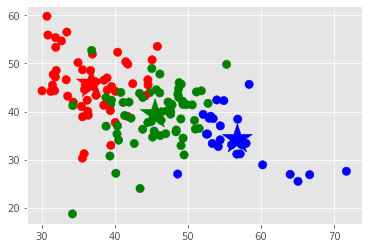

In [ ]:
# Graficas en 2D con las proyecciones a partir de nuestra gráfica 3D para visualizar mejor
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

[34.297953 44.986842 41.733854 40.377154 36.664677 33.531771 31.851102
 31.865118 46.393488 39.436667 52.750992 41.328182 54.407727 47.610076
 39.435149 48.617348 40.073543 43.37292  49.792403 30.020465 36.909459
 50.594462 34.186667 31.215455 47.27686  45.369773 35.943438 36.272348
 44.501603 49.028308 34.235923 53.11048  49.28542  52.895725 30.691797
 34.949528 41.76596  30.825938 38.948976 46.955854 45.053969 45.088504
 42.444615 40.046439 52.535221 56.691163 48.709282 53.453713 31.450855
 31.891474 49.077731 36.196989 38.91342  60.225087 35.545054 56.815859
 49.47     47.811742 35.779512 55.974031 40.502021 38.78828  52.082462
 57.427596 39.528547 39.36155  66.665564 48.587099 52.675729 45.813043
 44.765313 42.643386 44.512578 51.830571 42.202857 57.241308 36.353298
 35.566589 33.422105 31.7503   33.332362 41.929385 57.145227 46.137348
 49.331231 44.171154 49.322373 46.158281 48.355859 47.143474 48.403333
 40.281616 49.049323 47.737462 48.743333 38.766702 38.471406 54.911368
 37.24

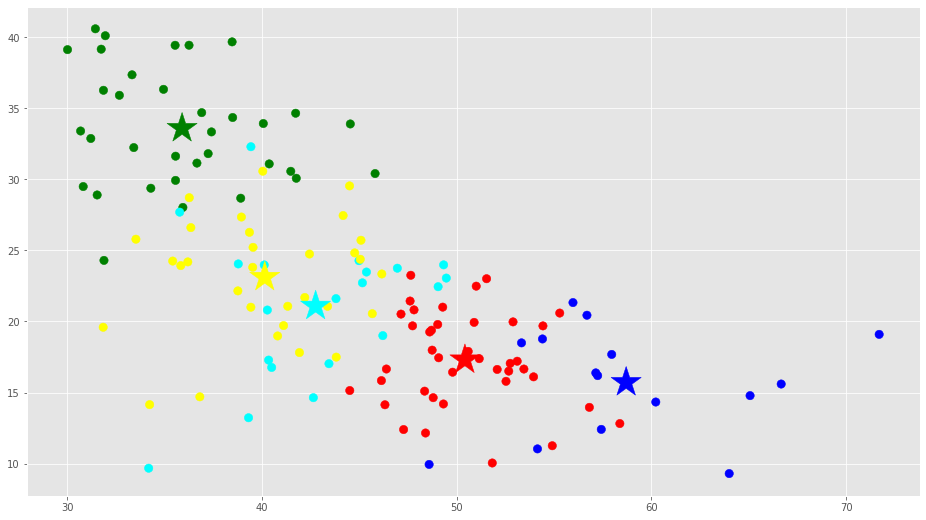

In [ ]:
# Getting the values and plotting it
f1 = df['op'].values
f2 = df['ag'].values
print(f1,f2)
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

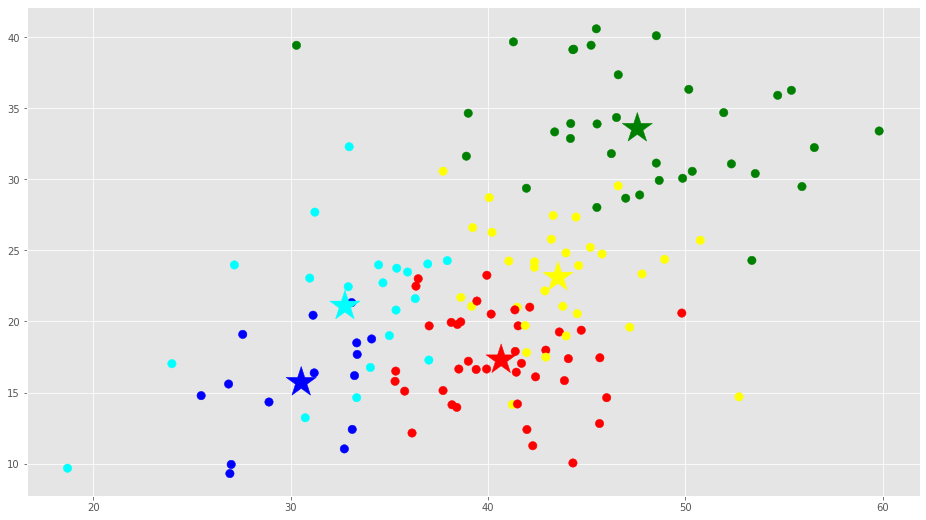

In [ ]:
f1 = df['ex'].values
f2 = df['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Numero de usuarios por cluster
dataframe=df
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,40
1,green,34
2,blue,15
3,cyan,20
4,yellow,31


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
print(closest)
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

[ 21  98  82 120  64]
carmenelectra
maria_patino
JudgeJudy
SarahPalinUSA
ierrejon


**Singular Value Decomposition SVD**

(545, 644)


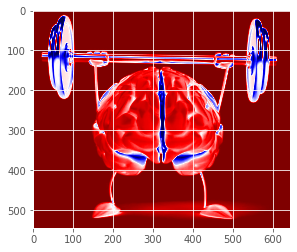

In [ ]:
# Importar librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import time
from PIL import Image,ImageOps #  conda install pillow
# Cargar imagen, convertirla a escala de grises y volverla matriz
im = Image.open("/content/brain.jpg")

gray_image = ImageOps.grayscale(im)
imgmat = np.asarray(gray_image)
print(imgmat.shape)
#Show actual Image
plt.imshow(imgmat, cmap='')

In [ ]:
# SVD
U, sigma, V = np.linalg.svd(imgmat) #factoriza la matriz de la imagen 

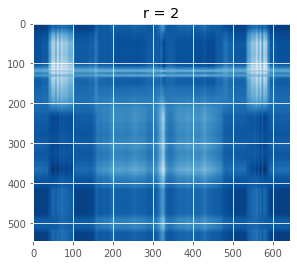

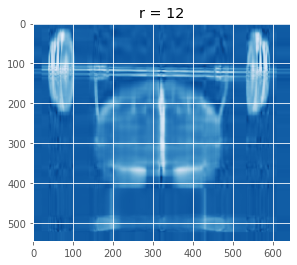

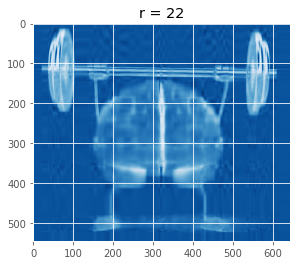

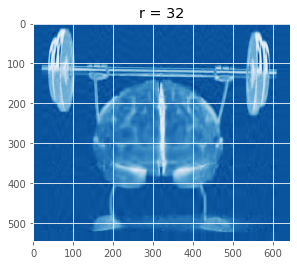

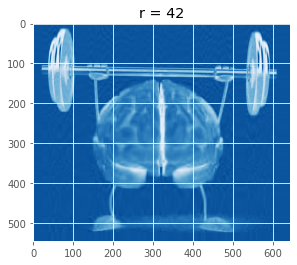

In [ ]:
# Graficar para diferentes r
for i in range(2, 50, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='Blues')
    title = "r = %s" % i
    plt.title(title)
    plt.show()